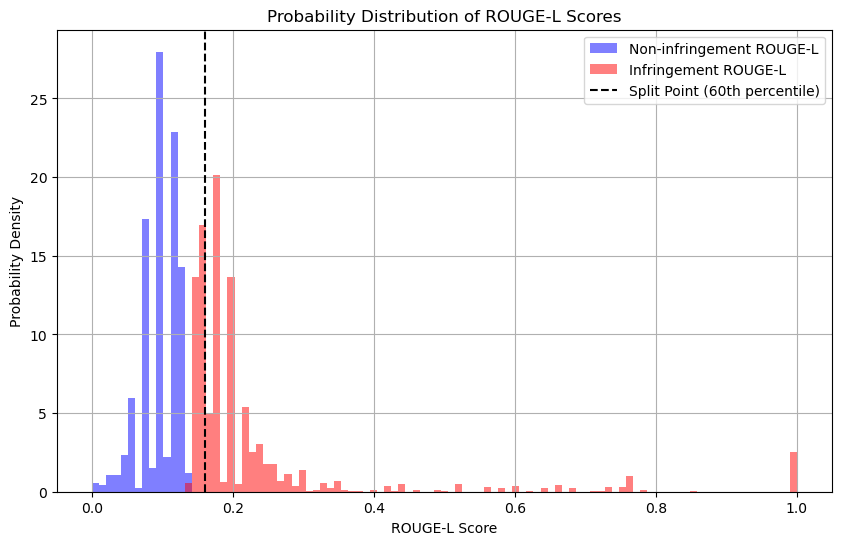

In [55]:
# Importing required libraries
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to load ROUGE-L values from a JSON file
def load_rouge_l_values(json_file):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return [entry['score_rouge_l'] for entry in data]

# Load ROUGE-L values from both JSON files
rouge_l_values_file1 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.non_infringement.json')
rouge_l_values_file2 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.infringement.json')

# Combine the ROUGE-L values from both datasets
combined_rouge_l_values = rouge_l_values_file1 + rouge_l_values_file2

# Set up the plot
plt.figure(figsize=(10, 6))

# Define the bins (0 to 1 range, 100 bins for finer granularity)
bins = np.linspace(0, 1, 100)

# Plot histogram for ROUGE-L values as probabilities for both datasets separately
plt.hist(rouge_l_values_file1, bins=bins, alpha=0.5, label='Non-infringement ROUGE-L', density=True, color='blue')
plt.hist(rouge_l_values_file2, bins=bins, alpha=0.5, label='Infringement ROUGE-L', density=True, color='red')

# Mark the split point on the x-axis
split_point = np.percentile(combined_rouge_l_values, 60)  # Use 60th percentile as split point

# Add a vertical line for the split point (60th percentile)
plt.axvline(split_point, color='black', linestyle='--', label=f'Split Point (60th percentile)')

# Adding labels and title
plt.xlabel('ROUGE-L Score')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of ROUGE-L Scores')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


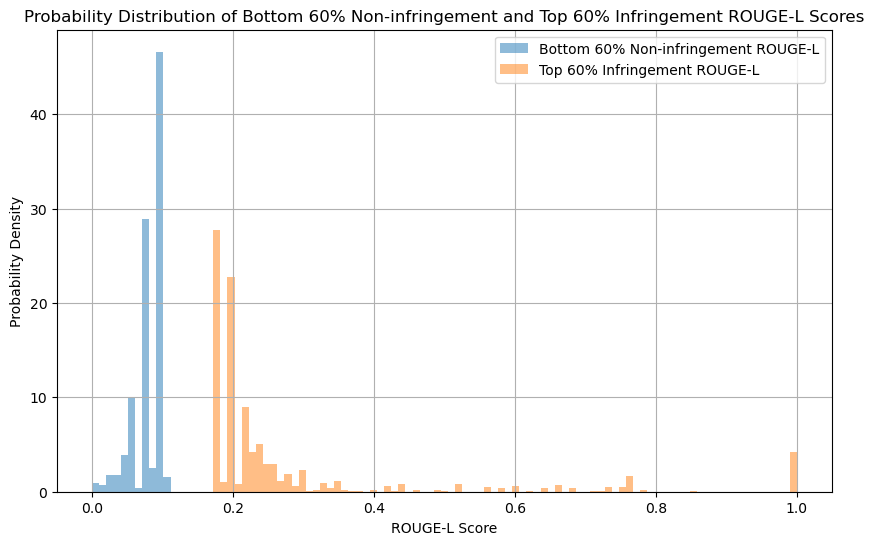

In [56]:
# Importing required libraries
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to load ROUGE-L values from a JSON file
def load_rouge_l_values(json_file):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return [entry['score_rouge_l'] for entry in data]

# Function to get top and bottom percentiles of the data
def get_top_bottom_percentiles(data, lower_percentile=60, upper_percentile=60):
    # Sort the data
    sorted_data = sorted(data)
    
    # Calculate the indices for the lower and upper percentiles
    lower_index = int(len(sorted_data) * lower_percentile / 100)
    upper_index = int(len(sorted_data) * (100 - upper_percentile) / 100)
    
    # Select the lowest 60% and highest 60% values
    bottom_60 = sorted_data[:lower_index]  # Lowest 60%
    top_60 = sorted_data[upper_index:]    # Highest 60%
    
    return top_60, bottom_60

# Load ROUGE-L values from both JSON files
rouge_l_values_file1 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.non_infringement.json')
rouge_l_values_file2 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.infringement.json')

# Get the top and bottom 60% ROUGE-L values
tp, bottom_60_file1 = get_top_bottom_percentiles(rouge_l_values_file1, upper_percentile=60)
top_60_file2 ,bt = get_top_bottom_percentiles(rouge_l_values_file2, lower_percentile=60)
# For non-infringement data, we take the bottom 60%, and for infringement data, we take the top 60%.

# Set up the plot
plt.figure(figsize=(10, 6))

# Define the bins (0 to 1 range, 100 bins for finer granularity)
bins = np.linspace(0, 1, 100)

# Plot histogram for ROUGE-L values as probabilities for the bottom 60% and top 60%
plt.hist(bottom_60_file1, bins=bins, alpha=0.5, label='Bottom 60% Non-infringement ROUGE-L', density=True)
plt.hist(top_60_file2, bins=bins, alpha=0.5, label='Top 60% Infringement ROUGE-L', density=True)

# Adding labels and title
plt.xlabel('ROUGE-L Score')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Bottom 60% Non-infringement and Top 60% Infringement ROUGE-L Scores')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


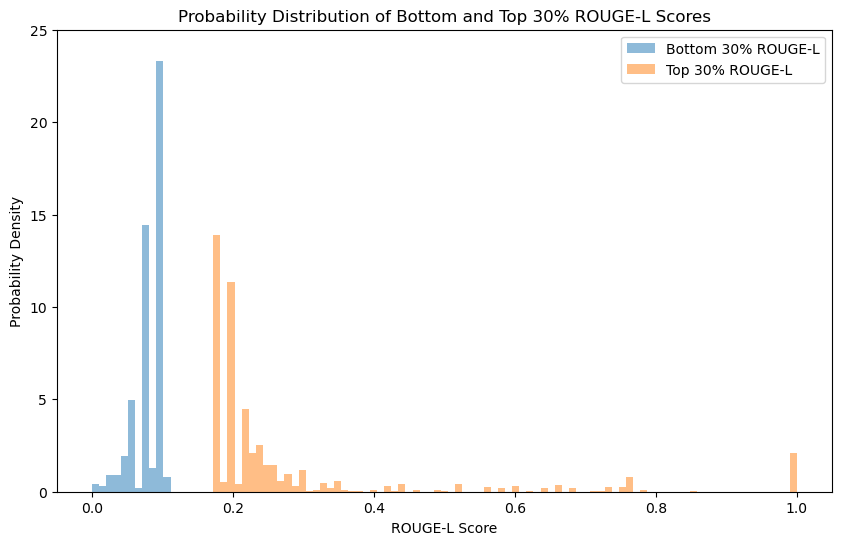

In [57]:
# Importing required libraries
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to load ROUGE-L values from a JSON file
def load_rouge_l_values(json_file):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return [entry['score_rouge_l'] for entry in data]

# Function to get top and bottom percentiles of the data
def get_top_bottom_percentiles(data, lower_percentile=60, upper_percentile=60):
    # Sort the data
    sorted_data = sorted(data)
    
    # Calculate the indices for the lower and upper percentiles
    lower_index = int(len(sorted_data) * lower_percentile / 100)
    upper_index = int(len(sorted_data) * (100 - upper_percentile) / 100)
    
    # Select the lowest 60% and highest 60% values
    bottom_60 = sorted_data[:lower_index]  # Lowest 60%
    top_60 = sorted_data[upper_index:]    # Highest 60%
    
    return top_60, bottom_60

# Load ROUGE-L values from both JSON files
rouge_l_values_file1 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.non_infringement.json')
rouge_l_values_file2 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.infringement.json')

# Get the top and bottom 60% ROUGE-L values
tp, bottom_60_file1 = get_top_bottom_percentiles(rouge_l_values_file1, upper_percentile=60)
top_60_file2 ,bt = get_top_bottom_percentiles(rouge_l_values_file2, lower_percentile=60)

# Set up the plot
plt.figure(figsize=(10, 6))

# Define the bins (0 to 1 range, 100 bins for finer granularity)
bins = np.linspace(0, 1, 100)

# Plot histogram for bottom 60% ROUGE-L values (Non-infringement) as probability density
plt.hist(bottom_60_file1, bins=bins, alpha=0.5, label='Bottom 30% ROUGE-L', density=True)

# Plot histogram for top 60% ROUGE-L values (Infringement) as probability density
plt.hist(top_60_file2, bins=bins, alpha=0.5, label='Top 30% ROUGE-L', density=True)

# Adjust the density values by halving them
for patch in plt.gca().patches:
    patch.set_height(patch.get_height() / 2)

# Adding labels and title
plt.xlabel('ROUGE-L Score')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Bottom and Top 30% ROUGE-L Scores')
plt.legend()

# Disable the grid (remove the gridlines)
plt.grid(False)

# Optionally, adjust the y-axis limits to make it appear higher
plt.ylim(0, 25)  # Adjust the upper bound of y-axis as needed

# Show the plot
plt.show()


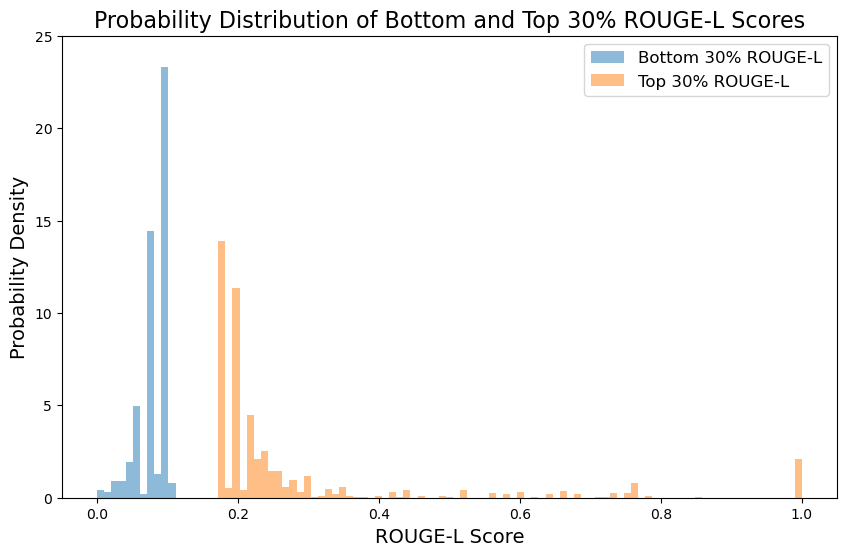

In [58]:
# Importing required libraries
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to load ROUGE-L values from a JSON file
def load_rouge_l_values(json_file):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return [entry['score_rouge_l'] for entry in data]

# Function to get top and bottom percentiles of the data
def get_top_bottom_percentiles(data, lower_percentile=60, upper_percentile=60):
    # Sort the data
    sorted_data = sorted(data)
    
    # Calculate the indices for the lower and upper percentiles
    lower_index = int(len(sorted_data) * lower_percentile / 100)
    upper_index = int(len(sorted_data) * (100 - upper_percentile) / 100)
    
    # Select the lowest 60% and highest 60% values
    bottom_60 = sorted_data[:lower_index]  # Lowest 60%
    top_60 = sorted_data[upper_index:]    # Highest 60%
    
    return top_60, bottom_60

# Load ROUGE-L values from both JSON files
rouge_l_values_file1 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.non_infringement.json')
rouge_l_values_file2 = load_rouge_l_values('/home/guangwei/LLM-COPYRIGHT/copyright_newVersion/test_division/extra.infringement.json')

# Get the top and bottom 60% ROUGE-L values
tp, bottom_60_file1 = get_top_bottom_percentiles(rouge_l_values_file1, upper_percentile=60)
top_60_file2 ,bt = get_top_bottom_percentiles(rouge_l_values_file2, lower_percentile=60)

# Set up the plot
plt.figure(figsize=(10, 6))

# Define the bins (0 to 1 range, 100 bins for finer granularity)
bins = np.linspace(0, 1, 100)

# Plot histogram for bottom 60% ROUGE-L values (Non-infringement) as probability density
plt.hist(bottom_60_file1, bins=bins, alpha=0.5, label='Bottom 30% ROUGE-L', density=True)

# Plot histogram for top 60% ROUGE-L values (Infringement) as probability density
plt.hist(top_60_file2, bins=bins, alpha=0.5, label='Top 30% ROUGE-L', density=True)

# Adjust the density values by halving them
for patch in plt.gca().patches:
    patch.set_height(patch.get_height() / 2)

# Adding labels and title with increased font size
plt.xlabel('ROUGE-L Score', fontsize=14)  # X-axis label with font size
plt.ylabel('Probability Density', fontsize=14)  # Y-axis label with font size
plt.title('Probability Distribution of Bottom and Top 30% ROUGE-L Scores', fontsize=16)  # Title with larger font

# Increase the font size of the legend
plt.legend(fontsize=12)

# Disable the grid (remove the gridlines)
plt.grid(False)

# Optionally, adjust the y-axis limits to make it appear higher
plt.ylim(0, 25)  # Adjust the upper bound of y-axis as needed

# Show the plot
plt.show()
